In [1]:
from qiskit.primitives import Sampler
from qiskit_algorithms.gradients import ParamShiftSamplerGradient
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
import numpy as np


From the number of locations visited find the qubits and longest binary string.

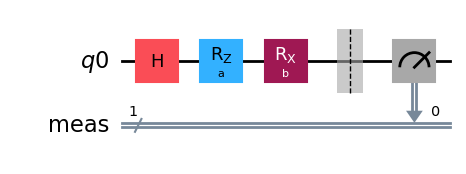

In [2]:
# Instantiate the quantum state with two parameters
a = Parameter('a')
b = Parameter('b')

q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q)
qc.rz(a, q[0])
qc.rx(b, q[0])
qc.measure_all() #important for sampler

qc.draw('mpl')


In [3]:

#Parameter list
param_vals = [[np.pi / 4, np.pi / 2]]
sampler = Sampler()
gradient = ParamShiftSamplerGradient(sampler)
pss_grad_result = gradient.run([qc], param_vals).result().gradients

print('State estimator gradient computed with parameter shift', pss_grad_result)

State estimator gradient computed with parameter shift [[{0: np.float64(0.35355339059327384), 1: np.float64(-0.35355339059327384)}, {0: np.float64(0.0), 1: np.float64(0.0)}]]


C:\Users\DanielGoldsmith\AppData\Local\Temp\ipykernel_4460\3461649450.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


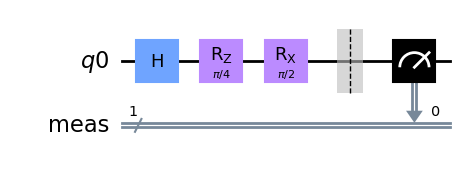

In [4]:
from quantum_functions import bind_weights, my_gradient
init_rots = [np.pi / 4, np.pi / 2]
params = [Parameter('a'), Parameter('b')]
bc = bind_weights(params, init_rots, qc)
bc.draw("mpl", style="clifford")

In [5]:
def my_cost_function(bit_string_list):
    if bit_string_list == [0]:
        return 0 
    elif bit_string_list == [1]:
        return 1
    else:
        raise Exception('Invalid bit string list')

In [6]:
results = my_gradient(my_cost_function, qc, params, init_rots, np.pi/2, 1024)
print(results)

processing 0th weight
rot = 0.7853981633974483 i=0
New rots+ = [2.356194490192345, 1.5707963267948966]
New rots+ = [-0.7853981633974483, 1.5707963267948966]
cost+ = 0.14453125 cost- = 0.853515625, delta = -0.3544921875
processing 1th weight
rot = 1.5707963267948966 i=1
New rots+ = [-0.7853981633974483, 3.141592653589793]
New rots+ = [-0.7853981633974483, 0.0]
cost+ = 0.53125 cost- = 0.4775390625, delta = 0.02685546875
[-0.3544921875, 0.02685546875]
